# Plot phylogenetic trees

In [11]:
## load necessary libraries
library(ggtree);
library(phangorn);
library(phytools);
library(colorspace);
library(RColorBrewer);

In [6]:
ablist <- c("Azi", "Cef", "Cip")
abnames <- c("Azithromycin", "Cefotaxime", "Ciprofloxacin")
prefix <- "./data/"
suffix <- ".aln.treefile"

col_palette <- list("Azi"=c("#162B93","#ACBDEA"), 
                    "Cef"=c("#455E21","#90BA67"), 
                    "Cip"=c( "#912719","#E27C74"));
colpal <-    c("black",  
               "#162B93","#ACBDEA",        
               "#455E21","#90BA67",  
               "#912719","#E27C74",
               "black", "black", "black")
colgroups <- c("14028S", 
               "Azi-biofilm", "Azi-plank", 
               "Cef-biofilm", "Cef-plank", 
               "Cip-biofilm", "Cip-plank", 
               "Control")

## phylogeny for each group

In [14]:
for (i in 1:length(ablist)) {
    tre <- unroot(read.tree(paste(prefix, ablist[i],suffix, sep="")))
    tre <- midpoint (tre) ## after outlier truncation
    tre <- reroot (tre, which (tre$tip.label %in% "14028Ssnps")) # reroot at this specific node

    tre$tip.label <- gsub("snps","", tre$tip.label)
    tre$tip.label <- gsub(paste(ablist[i],"-b", sep=""),"B", tre$tip.label)
    tre$tip.label <- gsub(paste(ablist[i],"-p", sep=""),"P", tre$tip.label) #Azi_plank --> Plank
    
    ## nested gsub removes prefix and sufix: A_B_C --> B
    groupInfo <- split(tre$tip.label, gsub("-\\w+","", tre$tip.label) )
    grouptre <- groupOTU(tre,groupInfo)

    color_palette <- c("black", col_palette[ablist[i]][[1]])

    p <- ggtree(grouptre)
    p <- p + geom_tiplab(align=TRUE, linetype=0, linesize=0.1, size=7, aes(x=8.9 * 1e-6, color=group))
    p <- p + geom_tippoint(size=8, shape=21, color="black", aes(fill=group))
    p <- p + ggplot2::xlim(0, 1.05 * 1e-5)
    p <- p + ggplot2::scale_fill_manual(values=color_palette)
    p <- p + ggplot2::scale_color_manual(values=color_palette)
    p <- p + theme_tree2(bgcolor="transparent") # adds bottom x scale 
    p <- p + theme(axis.text.x = ggplot2::element_text(size=18))
    ntips <- length(tre$tip.label)
    ggplot2::ggsave (paste(prefix, ablist[i],"_ggtree.png",sep=""), 
                     width = 16, height= 0.37*ntips, bg = "transparent");
}


Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Duplicated aesthetics after name standardisation: size”

### extra: circular trees

In [15]:
for (i in 1:length(ablist)) {
    tre <- unroot(read.tree(paste(prefix, ablist[i],suffix, sep="")))
    tre <- midpoint (tre) ## after outlier truncation
    tre <- reroot (tre, which (tre$tip.label %in% "14028Ssnps")) # reroot at this specific node

    tre$tip.label <- gsub("snps","", tre$tip.label)
    tre$tip.label <- gsub(paste(ablist[i],"-b", sep=""),"B", tre$tip.label)
    tre$tip.label <- gsub(paste(ablist[i],"-p", sep=""),"P", tre$tip.label) #Azi_plank --> Plank
    
    ## nested gsub removes prefix and sufix: A_B_C --> B
    groupInfo <- split(tre$tip.label, gsub("-\\w+","", tre$tip.label) )
    grouptre <- groupOTU(tre,groupInfo)

    color_palette <- c("black", col_palette[ablist[i]][[1]])

    p <- ggtree(grouptre, layout="circular", aes(color=group))
    p <- p + geom_tiplab2(align=FALSE,linetype=1, linesize=0.1, size=3)
    p <- p + ggplot2::scale_color_manual(values=color_palette)
    p + ggplot2::ggtitle(abnames[i])
    ggplot2::ggsave (paste(prefix, ablist[i],"_ggcircular.png",sep=""), width = 10, height= 10, bg = "white");
}


## Phylogeny for all sequences

$`14028S-NA`
[1] "14028S"

$`Azi-biofilm`
[1] "Azi-biofilm-E-B-S2" "Azi-biofilm-E-B-S3" "Azi-biofilm-L-B-S1"
[4] "Azi-biofilm-M-B-S1" "Azi-biofilm-L-B-S2" "Azi-biofilm-M-B-S2"
[7] "Azi-biofilm-M-B-S3"

$`Azi-plank`
[1] "Azi-plank-M-S1" "Azi-plank-M-S3" "Azi-plank-M-S2" "Azi-plank-L-S1"
[5] "Azi-plank-E-S3" "Azi-plank-E-S1"

$`Cef-biofilm`
 [1] "Cef-biofilm-E-D-S3" "Cef-biofilm-L-D-S3" "Cef-biofilm-L-D-S2"
 [4] "Cef-biofilm-M-D-S3" "Cef-biofilm-M-D-S2" "Cef-biofilm-E-D-S1"
 [7] "Cef-biofilm-L-C-S3" "Cef-biofilm-M-C-S2" "Cef-biofilm-L-D-S1"
[10] "Cef-biofilm-M-D-S1" "Cef-biofilm-E-C-S1"

$`Cef-plank`
[1] "Cef-plank-L-S3"   "Cef-plank-E-S3"   "Cef-plank-E-A-S2" "Cef-plank-L-S2"  
[5] "Cef-plank-M-S3"   "Cef-plank-M-S2"   "Cef-plank-M-S1"   "Cef-plank-L-S1"  

$`Cip-biofilm`
 [1] "Cip-biofilm-E-B-S1" "Cip-biofilm-L-B-S2" "Cip-biofilm-L-A-S1"
 [4] "Cip-biofilm-L-B-S3" "Cip-biofilm-L-C-S2" "Cip-biofilm-L-A-S2"
 [7] "Cip-biofilm-L-C-S1" "Cip-biofilm-E-A-S2" "Cip-biofilm-L-A-S3"
[10] "Cip-biof

Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Ignoring unknown parameters: fontface”Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Ignoring unknown parameters: fontface”Coordinate system already present. Adding new coordinate system, which will replace the existing one.


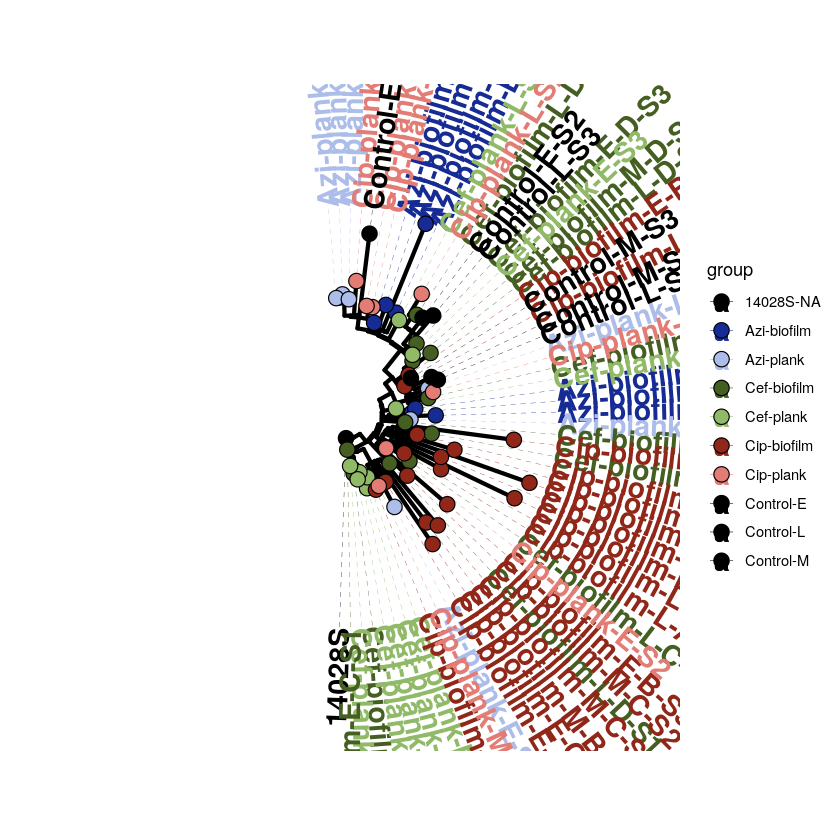

In [16]:
tre <- unroot(read.tree(paste(prefix,"all_sequences.aln.treefile",sep="")))
tre <- reroot (tre, which (tre$tip.label %in% "14028Ssnps"))
tre$tip.label <- gsub("snps","", tre$tip.label)
groupvec  <- unlist(lapply(tre$tip.label, function(i) paste(unlist(strsplit(i,"-"))[1:2],collapse="-")))
groupInfo <- split(tre$tip.label, groupvec)
print (groupInfo)
grouptre  <- groupOTU(tre, groupInfo)

p <- ggtree(grouptre, layout="fan", open.angle=170, size=1.2)
p <- p + geom_tiplab2(align=TRUE, linetype=2, linesize=0.1, size=6, fontface = "bold", aes(color=group))
p <- p + geom_tippoint(size=4, shape=21, color="black", aes(fill=group))
p <- p + ggplot2::scale_color_manual(values=colpal)
p <- p + ggplot2::scale_fill_manual(values=colpal)
p <- p + ggplot2::xlim(-1 * 1e-6, 1.2 * 1e-5)

rotate_tree(p, 265)
ggplot2::ggsave (paste(prefix,"all_sequences.png",sep=""), width = 20, height= 20, bg = "transparent");